<a href="https://colab.research.google.com/github/agupta1009/fake-profile-detection/blob/main/fake_profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
insta_train=pd.read_csv("train.csv")
insta_test=pd.read_csv("test.csv")


In [ ]:
insta_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
insta_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
insta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
print(insta_train.shape)
print(insta_test.shape)

(576, 12)
(120, 12)


In [ ]:
print(insta_train.isna().values.any().sum())
print(insta_test.isna().values.any().sum())

0
0


In [ ]:
train_Y=insta_train.fake
train_Y=pd.DataFrame(train_Y)
train_Y.tail(12)

,fake
564,1
565,1
566,1
567,1
568,1
569,1
570,1
571,1
572,1
573,1


In [ ]:
train_X= insta_train.drop(columns='fake')
train_X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [ ]:
test_Y=insta_test.fake
test_Y=pd.DataFrame(test_Y)
test_Y.tail(12)

,fake
108,1
109,1
110,1
111,1
112,1
113,1
114,1
115,1
116,1
117,1


In [ ]:
test_X= insta_test.drop(columns='fake')
test_X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)
logreg_predict= model_1.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
accuracy_score(logreg_predict,test_Y)

0.9083333333333333

In [ ]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.95      0.88      0.91        65

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [ ]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 labels = [1,2]
 cmap=sns.light_palette("blue")
 sns.heatmap(C, xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.show()

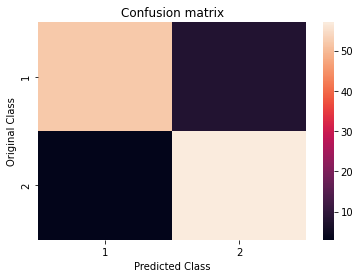

In [ ]:
plot_confusion_matrix(test_Y, logreg_predict)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)
knn_predict=model_2.predict(test_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
accuracy_score(knn_predict,test_Y)


0.8583333333333333

In [ ]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        60
           1       0.89      0.82      0.85        60

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



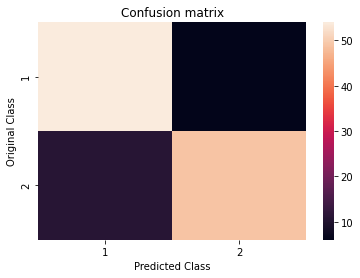

In [ ]:
plot_confusion_matrix(test_Y, knn_predict)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)
dtree_predict=model_3.predict(test_X)

In [ ]:
accuracy_score(dtree_predict,test_Y)


0.8666666666666667

In [ ]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        64
           1       0.83      0.89      0.86        56

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



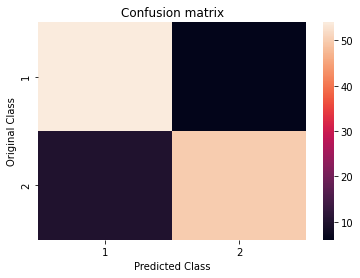

In [ ]:
plot_confusion_matrix(test_Y, dtree_predict)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)
rfc_predict=model_4.predict(test_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
accuracy_score(rfc_predict,test_Y)

0.925

In [ ]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        61
           1       0.92      0.93      0.92        59

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



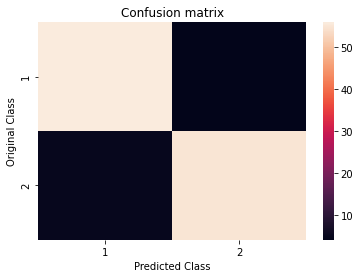

In [ ]:
plot_confusion_matrix(test_Y, rfc_predict)

In [ ]:
from sklearn.svm import SVC
svc=SVC()
model_5=svc.fit(train_X,train_Y)
svm_predict=model_5.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(svm_predict,test_Y)

0.525

In [ ]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10         3
           1       1.00      0.51      0.68       117

    accuracy                           0.53       120
   macro avg       0.53      0.76      0.39       120
weighted avg       0.98      0.52      0.66       120



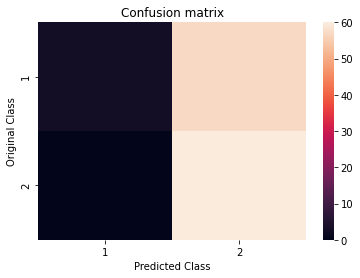

In [ ]:
plot_confusion_matrix(test_Y,svm_predict)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)
adc_predict=model_6.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(adc_predict,test_Y)

0.9

In [ ]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.88      0.91      0.90        58

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



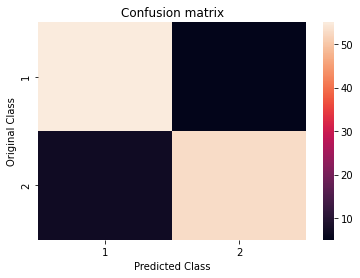

In [ ]:
plot_confusion_matrix(test_Y,adc_predict)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)
xgb_predict=model_7.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(xgb_predict,test_Y)

0.925

In [ ]:
print(classification_report(xgb_predict,test_Y))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        61
           1       0.92      0.93      0.92        59

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



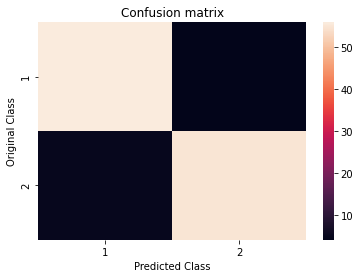

In [ ]:
plot_confusion_matrix(test_Y, xgb_predict)

In [ ]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))
print('XGBoost Accuracy:',accuracy_score(xgb_predict,test_Y))


Logistic Regression Accuracy: 0.9083333333333333
K-Nearest Neighbour Accuracy: 0.8583333333333333
Decision Tree Classifier Accuracy: 0.8666666666666667
Random Forest Classifier Accuracy: 0.925
support Vector Machine Accuracy: 0.525
Adaboost Classifier Accuracy: 0.9
XGBoost Accuracy: 0.925
